## Convolução 2D

Agora já podemos começar a trabalhar com imagens!! A convolução **2D** consiste em deslocar um kernel ao longo do dado, podendo desta vez se deslocar em duas dimensões. Igualmente, o kernel também pode possuir duas dimensões.



In [2]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

Vamos assumir que buscamos **detectar bordas em imagens**. Usaremos como exemplo a imagem de uma parede de tijolos:
```python
img = data.brick()
```

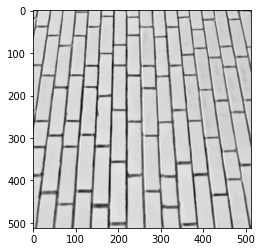

In [3]:
img = data.brick()
plt.imshow(img, cmap='Greys')

Para nos auxiliar daqui pra frente, vamos definir um método para imprimir os kernels como imagens.

In [4]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

Vamos agora definir dois kernels diferentes:
* Kernel de bordas **verticais**
* Kernel de bordas **horizontais**


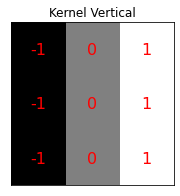

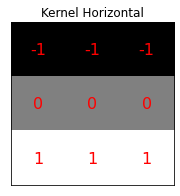

In [5]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

Vamos agora convoluir ambos os kernels com a parede de tijolos e observar o resultado. Cada kernel destacará partes diferentes da imagem!!

O resultado da convolução entre o dado e o kernel é chamado de **Mapa de Características** ou **Mapa de Ativação**.

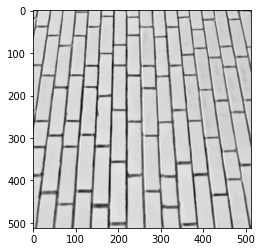

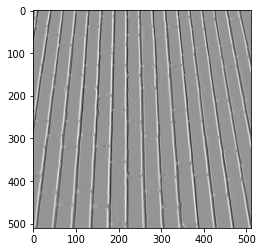

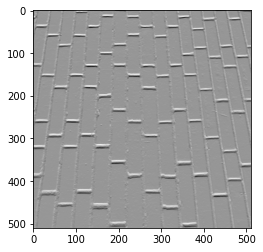

In [7]:
mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

### Uma observação sobre as ativações

Quando definimos o kernel, ele buscará o padrão para o qual foi definido, mas vale observar melhor o seu comportamento.
Vamos imprimir o kernel original, e a sua versão invertida que é de fato operada com a imagem durante a convolução.

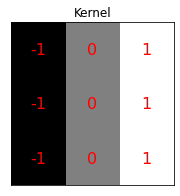

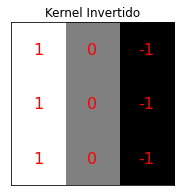

In [ ]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Invertido')

Vamos aplicar esse kernel a uma imagem que talvez você conheça. A logo de uma empresa de cursos online em tecnologia e marketing digital!

In [ ]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

--2020-05-25 15:58:50--  https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png
Resolving is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)... 23.52.168.63, 2600:1406:13:18a::2a1, 2600:1406:13:189::2a1, ...
Connecting to is5-ssl.mzstatic.com (is5-ssl.mzstatic.com)|23.52.168.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30159 (29K) [image/png]
Saving to: ‘1200x630wa.png’

1200x630wa.png      100%[===================>]  29.45K  --.-KB/s    in 0.008s  

2020-05-25 15:58:51 (3.77 MB/s) - ‘1200x630wa.png’ saved [30159/30159]



Text(0.5, 1.0, 'Mapa de ativação')

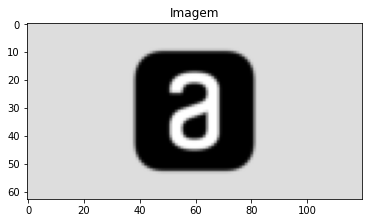

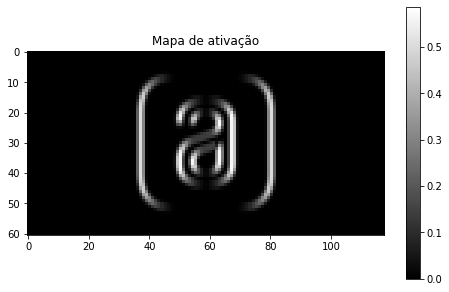

In [ ]:
img = io.imread('1200x630wa.png')
img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0]//10, img.shape[1]//10) )

saida = convolve(img, kernel_v, 'valid')

plt.imshow(img, cmap='gray')
plt.title('Imagem')

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Mapa de ativação')

Note que o valor absoluto da ativação do kernel é alto quando encontra um bom casamento para o seu padrão, mas também quando encontra o padrão oposto ao que carrega. No último caso, sua ativação tem sinal negativo.